Preview of test dataset:


,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0



Test dataset shape: (20000, 17)
Train dataset shape: (100000, 17)


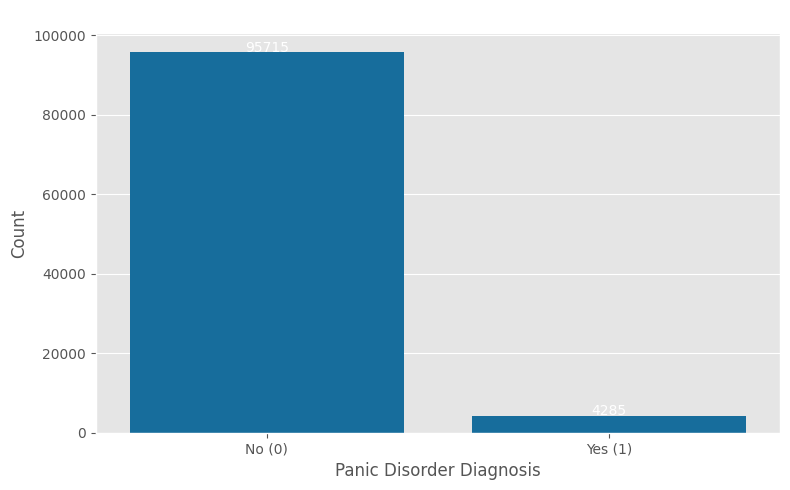

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Load datasets
df = pd.read_csv("test.csv", header=0, encoding='utf-8')
df_t = pd.read_csv("train.csv", header=0, encoding='utf-8')

# Display first few rows
print("Preview of test dataset:")
display(df.head())

# Basic dataset info
print("\nTest dataset shape:", df.shape)
print("Train dataset shape:", df_t.shape)

# Check class distribution in original training data
plt.figure(figsize=(8, 5))
class_counts = df_t['Panic Disorder Diagnosis'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Imbalance in Original Training Data')
plt.xlabel('Panic Disorder Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 100, f"{count}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Original class distribution:
Panic Disorder Diagnosis
0    95715
1     4285
Name: count, dtype: int64


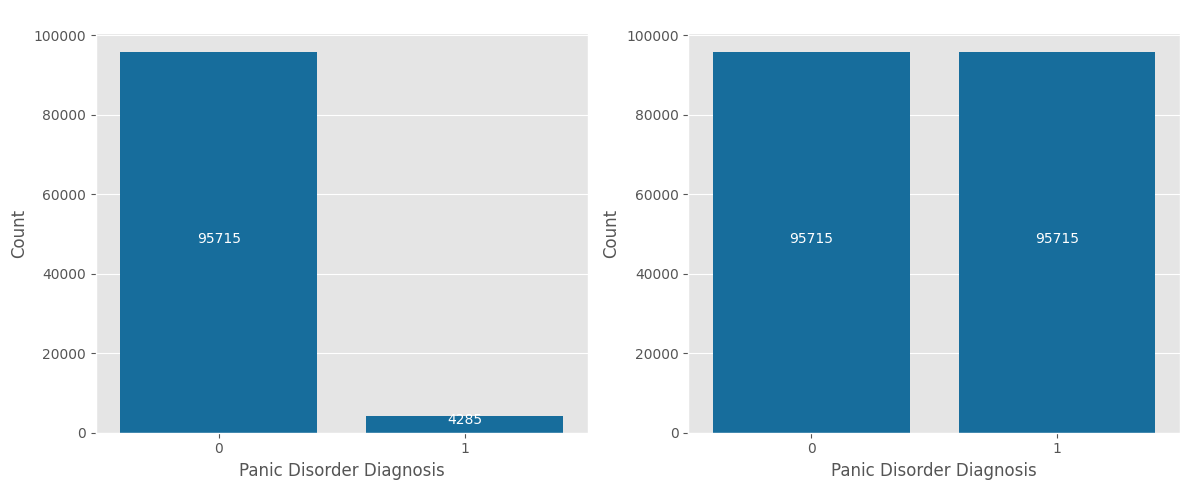

Balanced class distribution:
Panic Disorder Diagnosis
0    95715
1    95715
Name: count, dtype: int64


In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv("train.csv")

print("Original class distribution:")
original_counts = df['Panic Disorder Diagnosis'].value_counts()
print(original_counts)

# You'll need to convert categorical variables to numerical for SMOTE
categorical_cols = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 
                    'Symptoms', 'Severity', 'Impact on Life', 'Demographics', 
                    'Medical History', 'Psychiatric History', 'Substance Use', 
                    'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']

# Dictionary to store encoders for each column
label_encoders = {}

for col in categorical_cols:
    if df[col].dtype == 'object':  # Only process string columns
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Split features and target
X = df.drop('Panic Disorder Diagnosis', axis=1)
# Also drop ID column if present
if 'Participant ID' in X.columns:
    X = X.drop('Participant ID', axis=1)
    
y = df['Panic Disorder Diagnosis']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create balanced dataframe
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['Panic Disorder Diagnosis'] = y_resampled

# Save balanced dataset
balanced_df.to_csv('smote_balanced_train.csv', index=False)

# Plot the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.countplot(x=df['Panic Disorder Diagnosis'], ax=ax[0])
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Panic Disorder Diagnosis')
ax[0].set_ylabel('Count')
for i, count in enumerate(original_counts.values):
    ax[0].text(i, count/2, f"{count}", ha='center', color='white', fontsize=10)

# Balanced distribution
balanced_counts = balanced_df['Panic Disorder Diagnosis'].value_counts().sort_index()
sns.countplot(x=balanced_df['Panic Disorder Diagnosis'], ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Panic Disorder Diagnosis')
ax[1].set_ylabel('Count')
for i, count in enumerate(balanced_counts.values):
    ax[1].text(i, count/2, f"{count}", ha='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

print("Balanced class distribution:")
print(balanced_df['Panic Disorder Diagnosis'].value_counts().sort_index())


Preview of balanced dataset:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,1,0,1,2,4,0,0,0,1,1,2,3,0,2,0
1,51,1,0,0,0,3,0,0,1,0,0,1,0,0,2,0
2,32,0,1,0,0,3,0,2,1,1,2,2,2,2,1,0
3,64,0,0,0,2,0,1,1,0,1,3,2,1,0,1,0
4,31,1,1,0,2,3,0,1,0,0,3,1,2,1,2,0



Balanced dataset shape: (191430, 16)
Original dataset shape: (100000, 17)


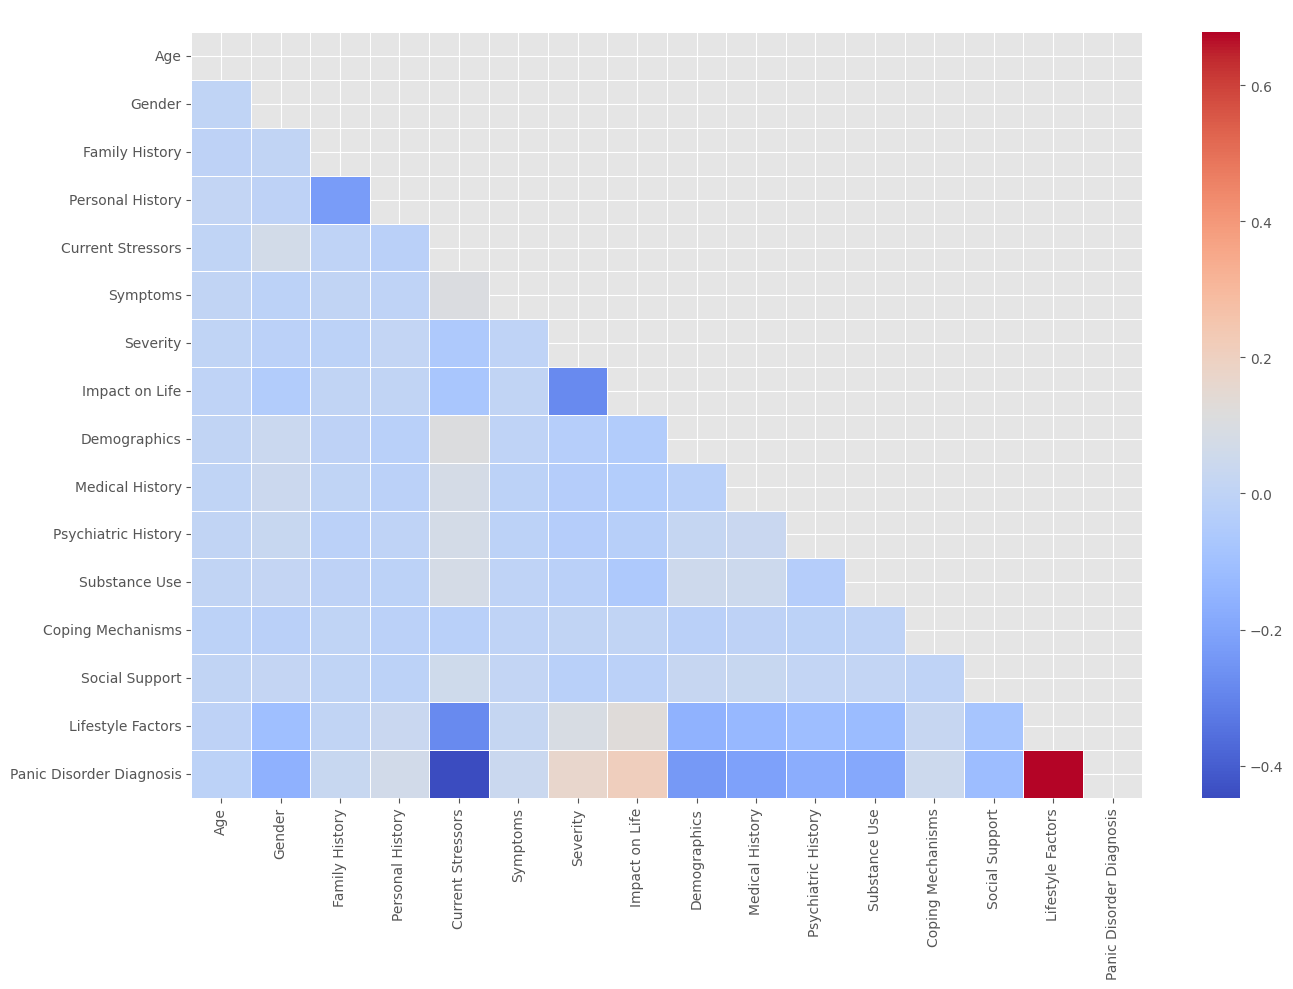

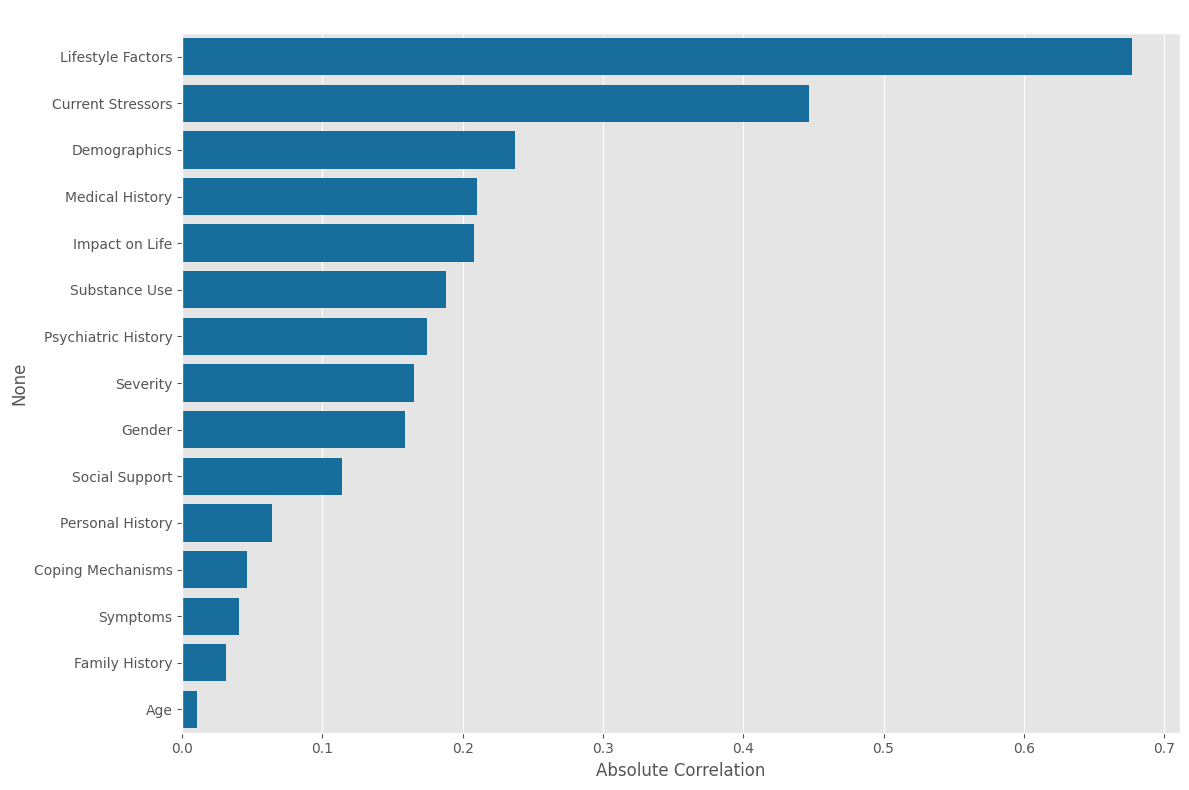

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the balanced dataset
df = pd.read_csv("smote_balanced_train.csv", header=0, encoding='utf-8')
df_t = pd.read_csv("train.csv", header=0, encoding='utf-8')

# Display first few rows of balanced data
print("Preview of balanced dataset:")
display(df.head())

# Basic info
print("\nBalanced dataset shape:", df.shape)
print("Original dataset shape:", df_t.shape)

# Feature correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Feature importance analysis
plt.figure(figsize=(12, 8))
features = df.drop('Panic Disorder Diagnosis', axis=1).columns
feature_importance = np.abs(df.drop('Panic Disorder Diagnosis', axis=1).corrwith(df['Panic Disorder Diagnosis']))
feature_importance = feature_importance.sort_values(ascending=False)

sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()


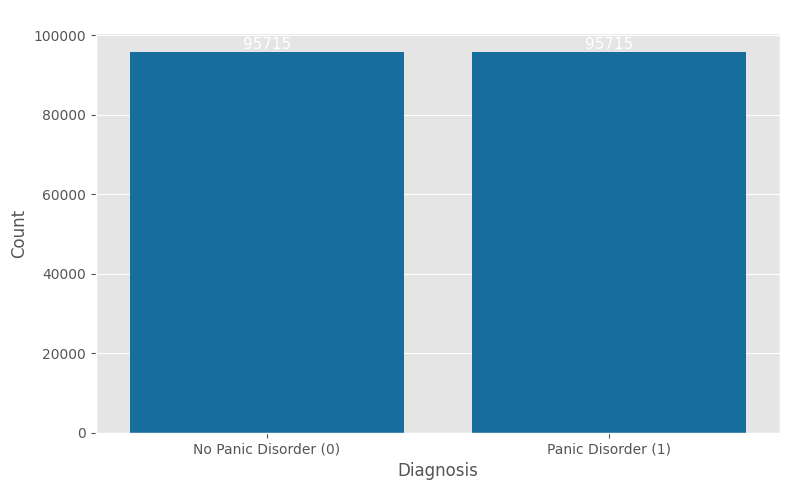

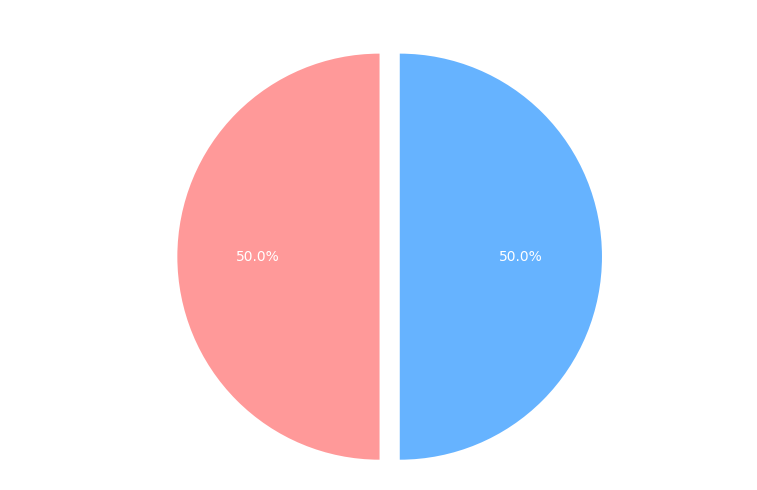

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target distribution with improved visualization
def count_target():
    plt.figure(figsize=(8, 5))
    
    # Get value counts
    values = df['Panic Disorder Diagnosis'].value_counts().sort_index()
    
    # Create a nicer bar plot
    ax = sns.barplot(x=['No Panic Disorder (0)', 'Panic Disorder (1)'], y=values)
    
    # Add count labels on top of bars
    for i, count in enumerate(values):
        ax.text(i, count + (count*0.01), f"{count}", ha='center', fontsize=11)
    
    plt.title('Class Distribution After Balancing', fontsize=14)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel('Diagnosis', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Pie chart representation
    plt.figure(figsize=(8, 5))
    plt.pie(values, labels=['No Panic Disorder (0)', 'Panic Disorder (1)'], 
            autopct='%1.1f%%', startangle=90, explode=[0, 0.1],
            colors=['#ff9999','#66b3ff'])
    plt.title('Class Distribution (%) After Balancing', fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
count_target()



Category: Gender
label: 1 (0)
label: 0 (1)


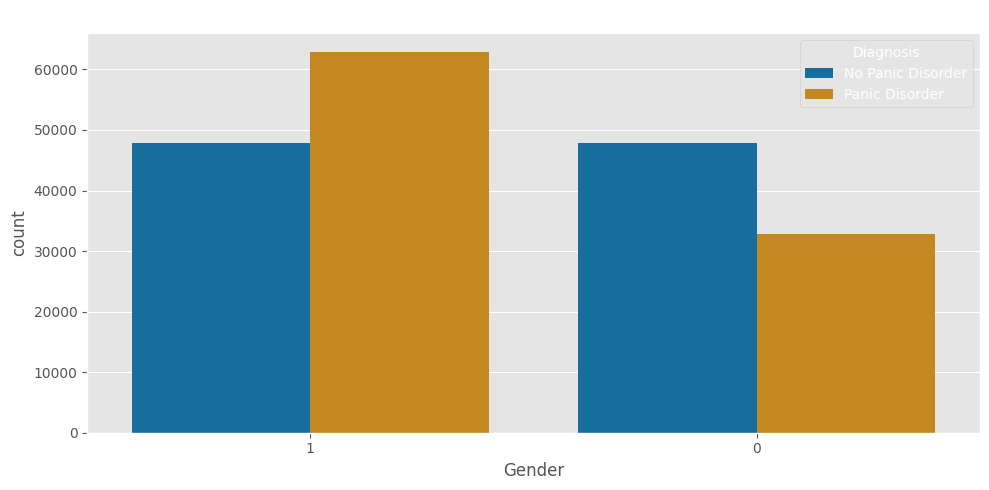

Category: Family History
label: 0 (0)
label: 1 (1)


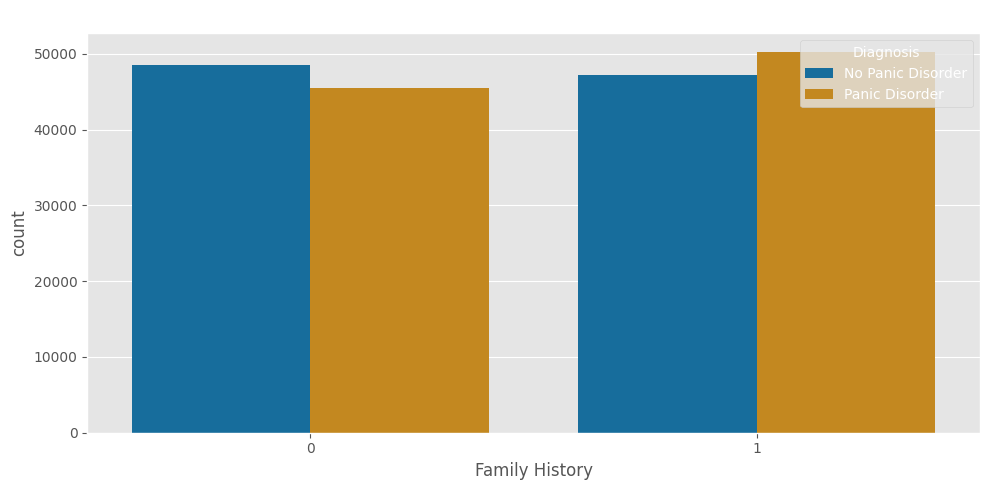

Category: Personal History
label: 1 (0)
label: 0 (1)


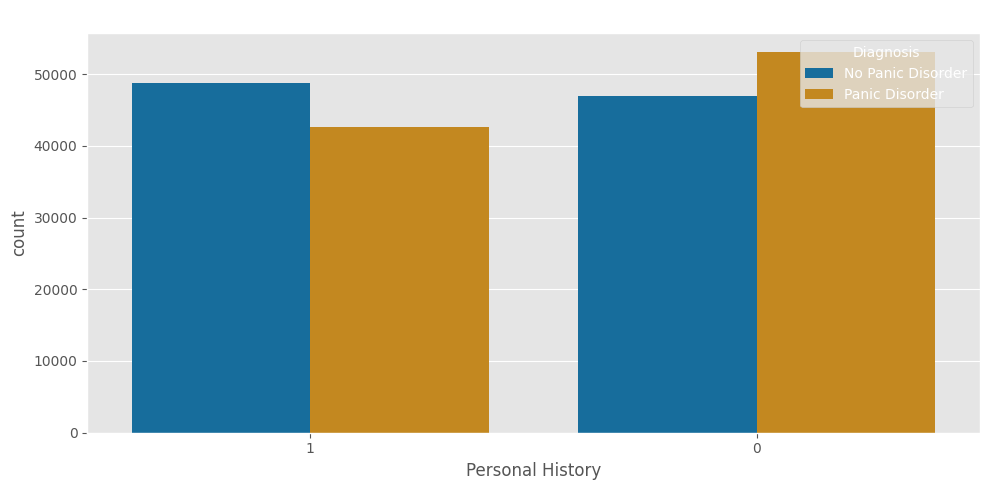

Category: Current Stressors
label: 2 (0)
label: 0 (1)
label: 1 (2)


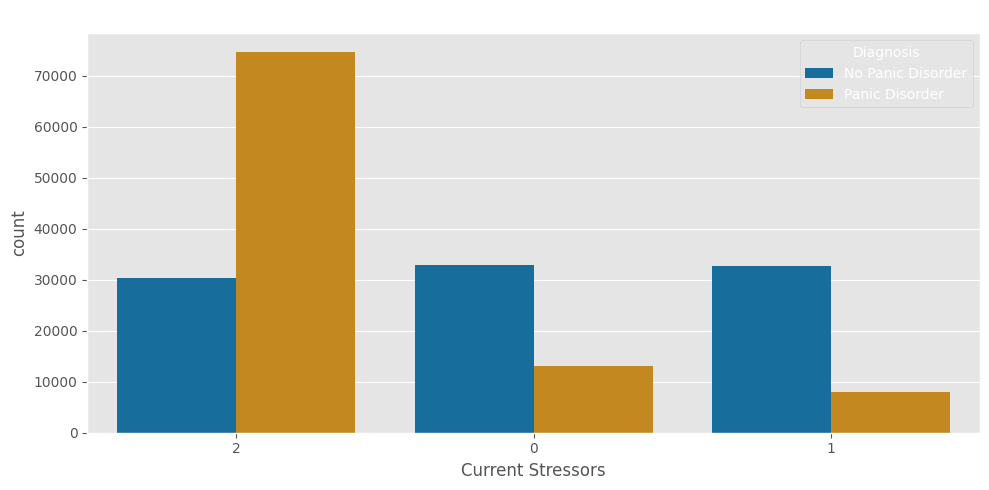

Category: Symptoms
label: 4 (0)
label: 3 (1)
label: 0 (2)
label: 1 (3)
label: 2 (4)


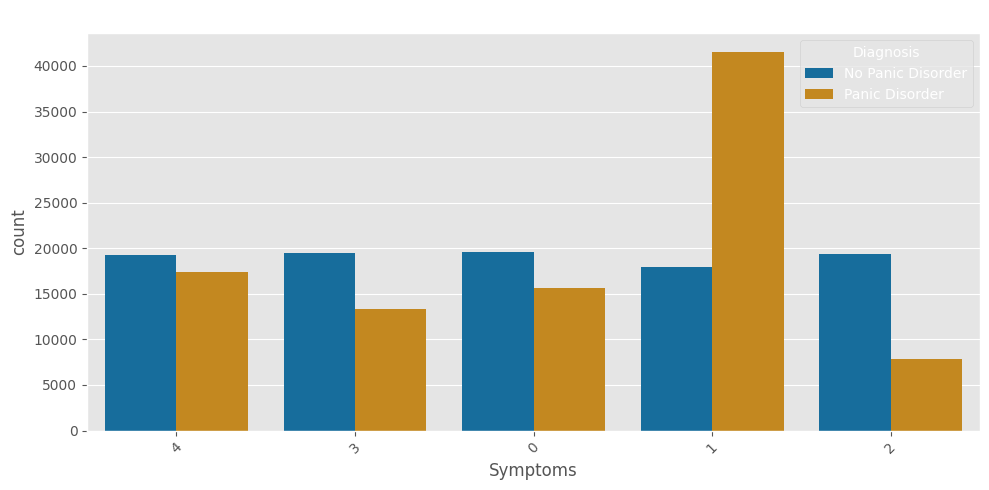

Category: Severity
label: 0 (0)
label: 1 (1)
label: 2 (2)


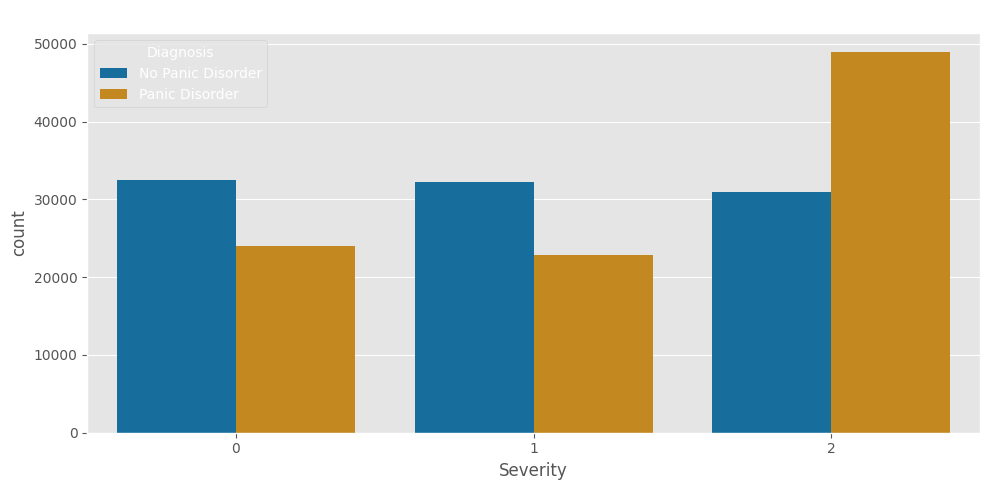

Category: Impact on Life
label: 0 (0)
label: 2 (1)
label: 1 (2)


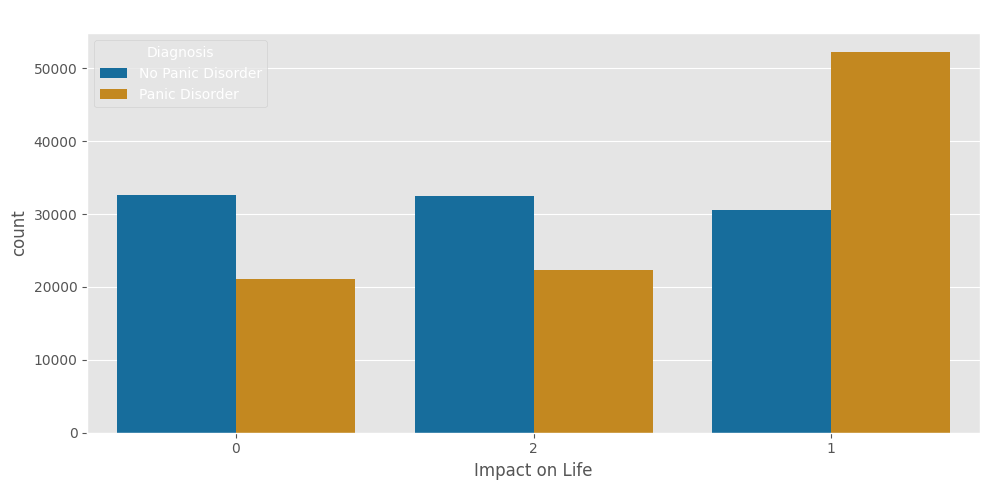

Category: Demographics
label: 0 (0)
label: 1 (1)


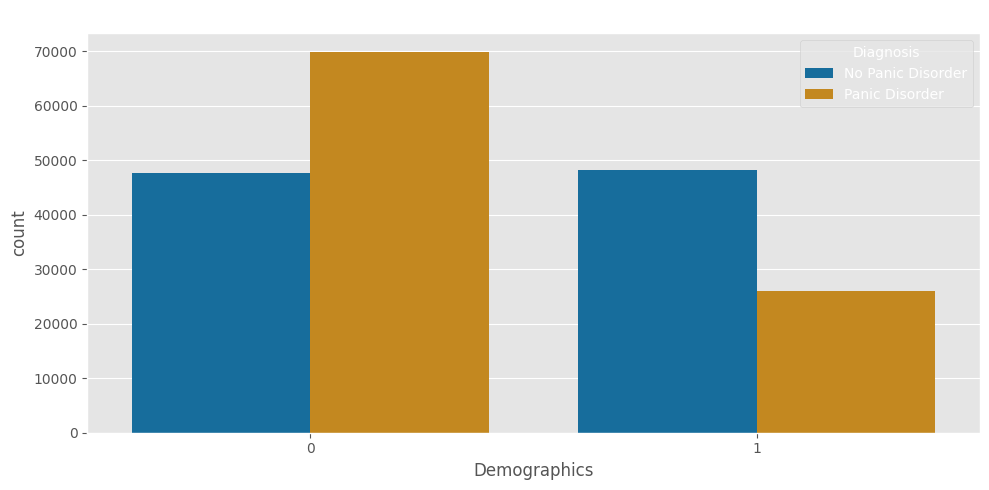

Category: Medical History
label: 1 (0)
label: 0 (1)
label: 3 (2)
label: 2 (3)


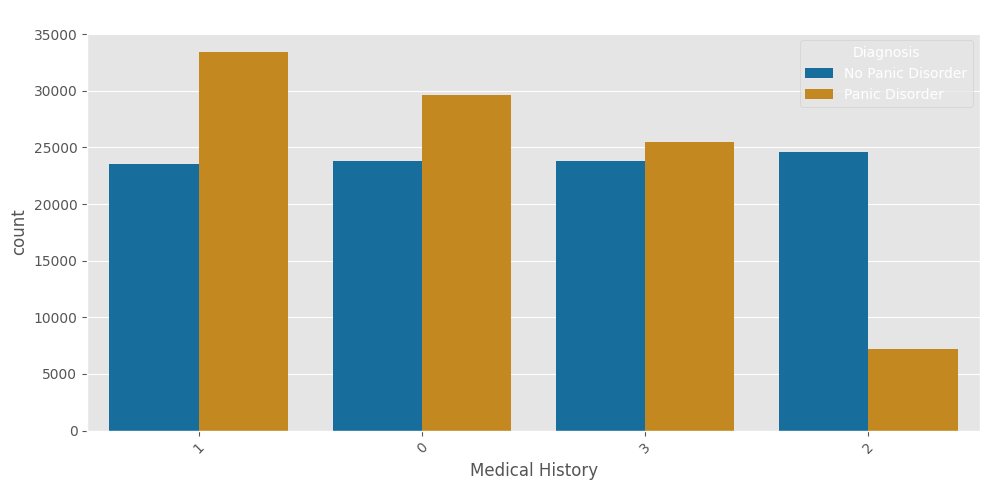

Category: Psychiatric History
label: 1 (0)
label: 0 (1)
label: 2 (2)
label: 3 (3)


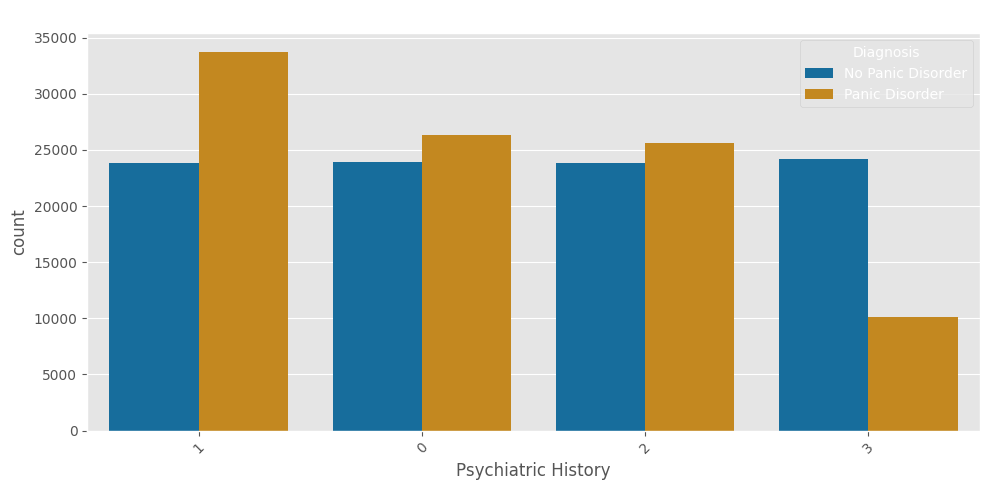

Category: Substance Use
label: 2 (0)
label: 1 (1)
label: 0 (2)


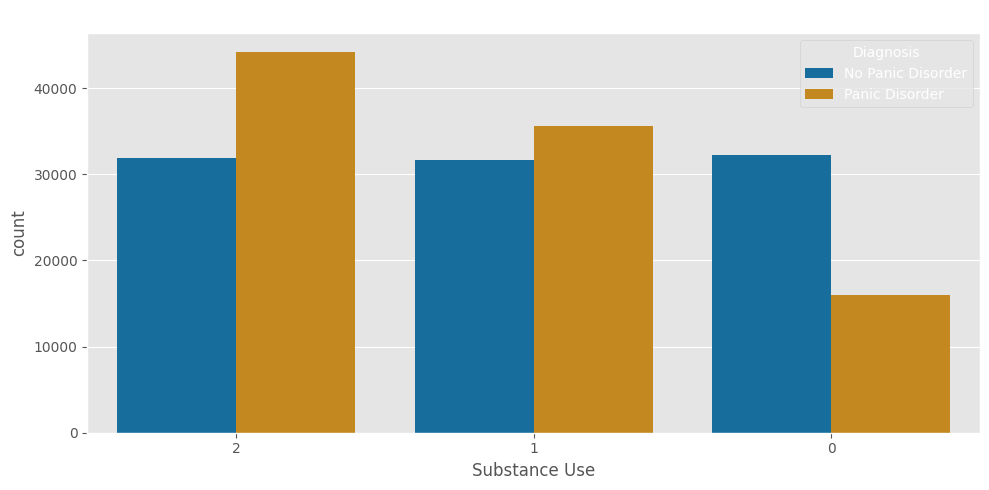

Category: Coping Mechanisms
label: 3 (0)
label: 0 (1)
label: 2 (2)
label: 1 (3)


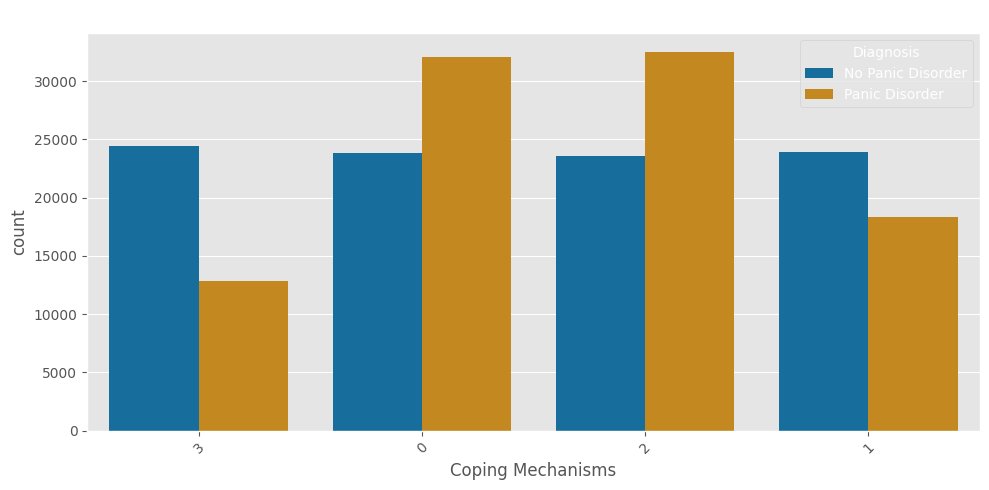

Category: Social Support
label: 0 (0)
label: 2 (1)
label: 1 (2)


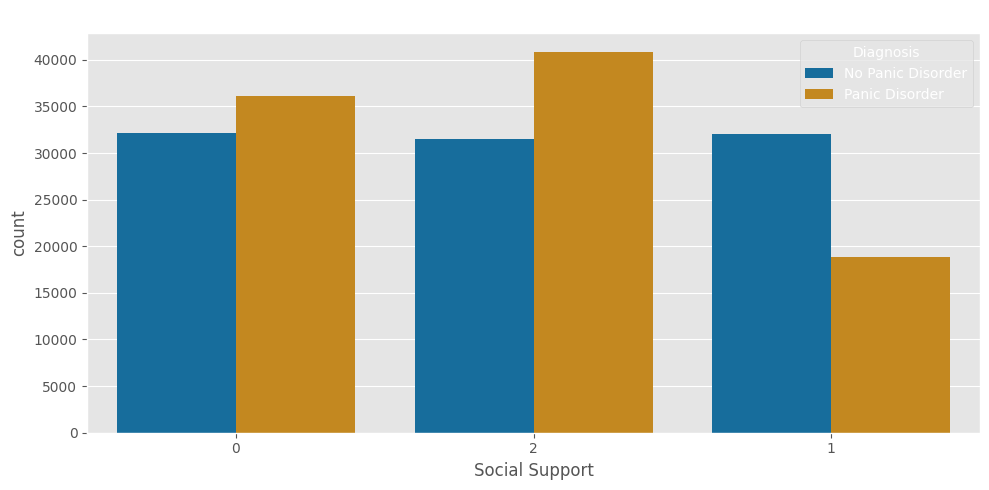

Category: Lifestyle Factors
label: 2 (0)
label: 1 (1)
label: 0 (2)


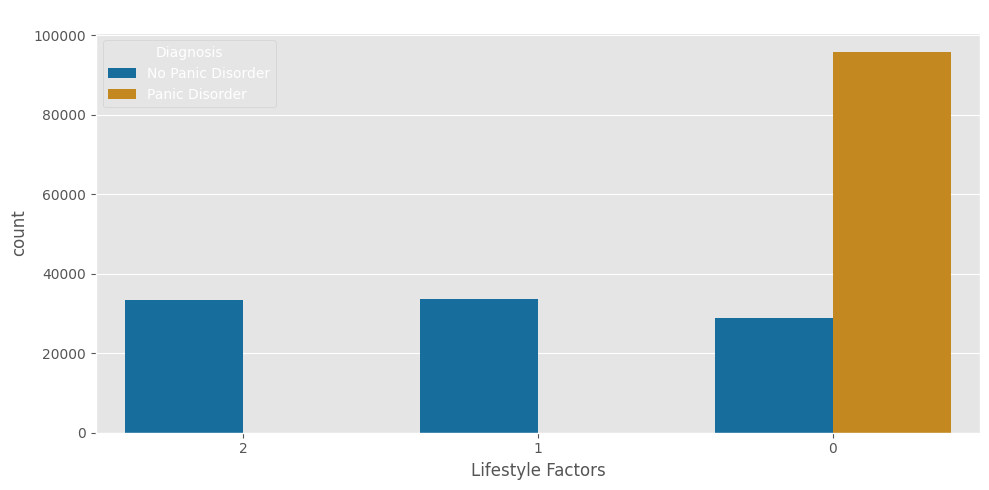


Dataset after encoding:


,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,1,2,1,0,0,2,2,2,1,1,0,0,2,0,2
1,51,1,2,2,2,0,2,2,1,2,2,1,2,2,0,2
2,32,2,1,2,2,0,2,0,1,1,0,0,0,0,1,2
3,64,2,2,2,0,2,1,1,2,1,0,0,1,2,1,2
4,31,1,1,2,0,0,2,1,2,2,0,1,0,1,0,2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping dictionary
mapping_dict = dict()
    
# Display labels for each category and new integer
def encode_features():
    categ_features = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity',
                      'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History','Substance Use',
                      'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']
    
    for col in categ_features:
        unique_values = df[col].unique()
        print('='*40)
        print(f'Category: {col}')
        
        # Dictionary to store value-label pairs for plotting
        labels = {}
        
        for i, value in enumerate(unique_values):
            mapping_dict[value] = i
            category = value
            print(f'label: {category} ({i})')
            labels[i] = category
        
        # Create a visualization for this feature
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='Panic Disorder Diagnosis', data=df)
        plt.title(f'Distribution of {col} by Diagnosis')
        plt.xlabel(col)
        plt.xticks(range(len(labels)), [f"{labels[i]}" for i in range(len(labels))], rotation=45 if len(labels) > 3 else 0)
        plt.legend(title='Diagnosis', labels=['No Panic Disorder', 'Panic Disorder'])
        plt.tight_layout()
        plt.show()

encode_features()

# Apply/replace into new values
df = df.replace(mapping_dict)

# Display the first few rows after encoding
print("\nDataset after encoding:")
display(df.head())


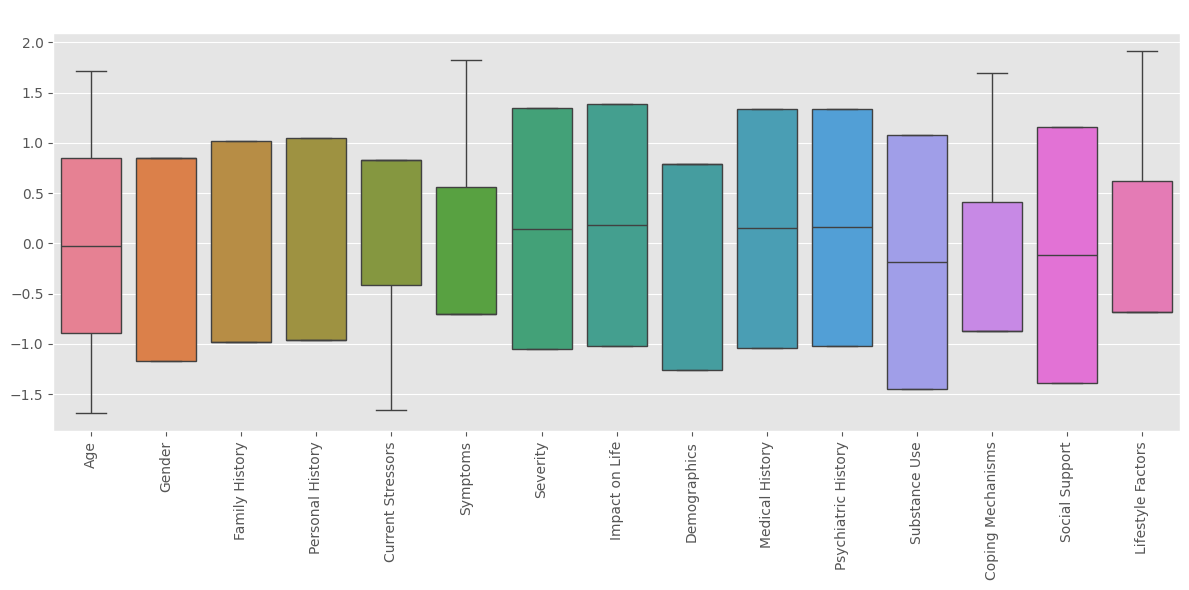

Train Data: 134001
Test Data: 57429


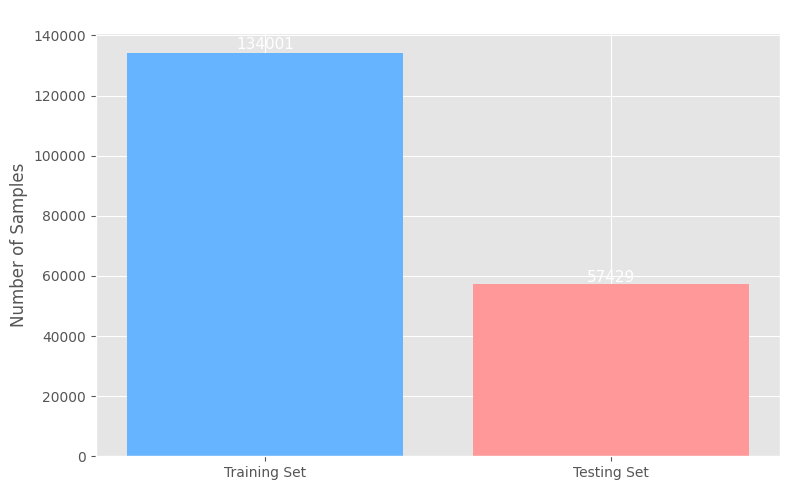

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Standardize and split data
def standardize_split_data():
    # Features for X array
    features = df.drop(['Panic Disorder Diagnosis'], axis=1)
    
    global X, y, X_train, X_test, y_train, y_test
    
    # Rescale data - feature array X
    X = (features - np.mean(features, axis=0)) / (np.std(features, axis=0)).values
    # Target data y
    y = df['Panic Disorder Diagnosis'].values
    
    # Visualize standardized features
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X)
    plt.title('Standardized Features Distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Partition data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)
    
    # Display number of samples per set
    print('Train Data:', len(X_train))
    print('Test Data:', len(X_test))
    
    # Visualize train-test split
    plt.figure(figsize=(8, 5))
    plt.bar(['Training Set', 'Testing Set'], [len(X_train), len(X_test)], color=['#66b3ff','#ff9999'])
    plt.title('Data Split Distribution')
    plt.ylabel('Number of Samples')
    
    # Add count labels on top of bars
    plt.text(0, len(X_train) + (len(X_train)*0.01), f"{len(X_train)}", ha='center', fontsize=11)
    plt.text(1, len(X_test) + (len(X_test)*0.01), f"{len(X_test)}", ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
standardize_split_data()


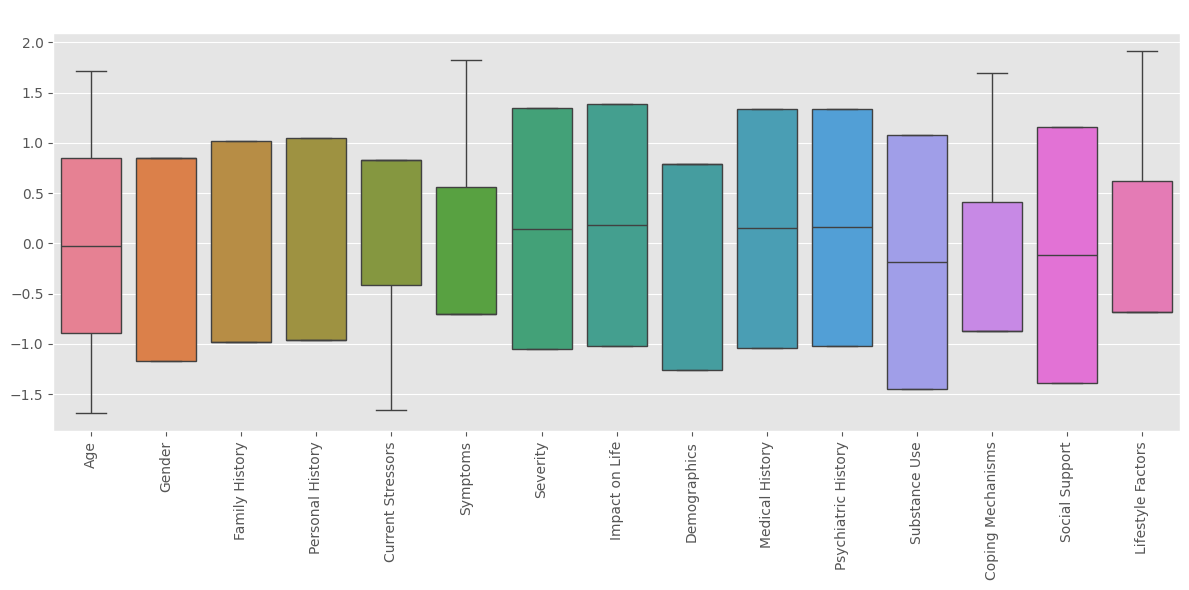

Train Data: 134001
Test Data: 57429


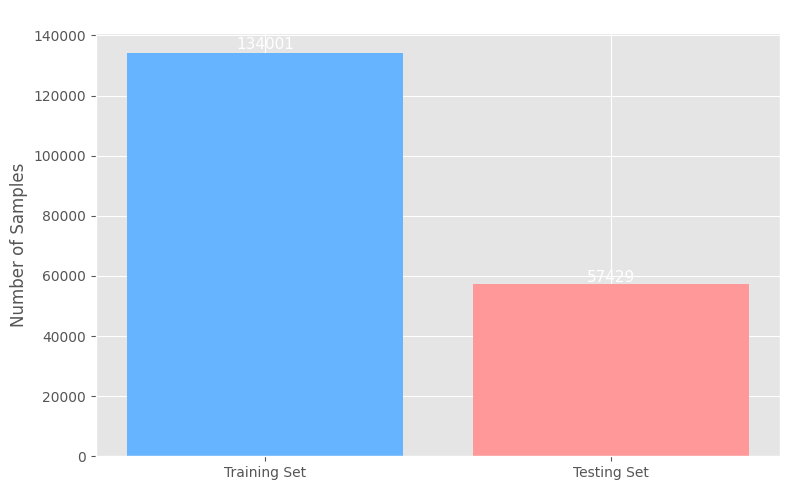

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

def standardize_split_data():

    features = df.drop(['Panic Disorder Diagnosis'], axis=1)
    
    
    global X, y, X_train, X_test, y_train, y_test
    
    X = (features - np.mean(features, axis=0)) / (np.std(features, axis=0)).values
    y = df['Panic Disorder Diagnosis'].values
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=X)
    plt.title('Standardized Features Distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)

    print('Train Data:', len(X_train))
    print('Test Data:', len(X_test))
    plt.figure(figsize=(8, 5))
    plt.bar(['Training Set', 'Testing Set'], [len(X_train), len(X_test)], color=['#66b3ff','#ff9999'])
    plt.title('Data Split Distribution')
    plt.ylabel('Number of Samples')
    
    plt.text(0, len(X_train) + (len(X_train)*0.01), f"{len(X_train)}", ha='center', fontsize=11)
    plt.text(1, len(X_test) + (len(X_test)*0.01), f"{len(X_test)}", ha='center', fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
standardize_split_data()


Model Performance Metrics:
------------------------------
Accuracy (RF): 0.9796
Precision (RF): 0.9671
Recall (RF): 0.9934
F1 Score (RF): 0.9801
Matthews Correlation Coefficient (RF): 0.9596

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98     28972
           2       0.99      0.97      0.98     28457

    accuracy                           0.98     57429
   macro avg       0.98      0.98      0.98     57429
weighted avg       0.98      0.98      0.98     57429



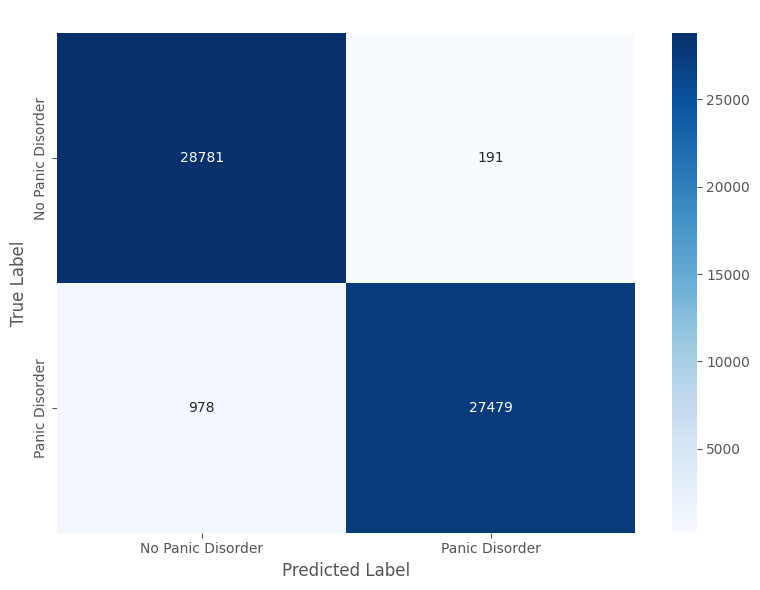

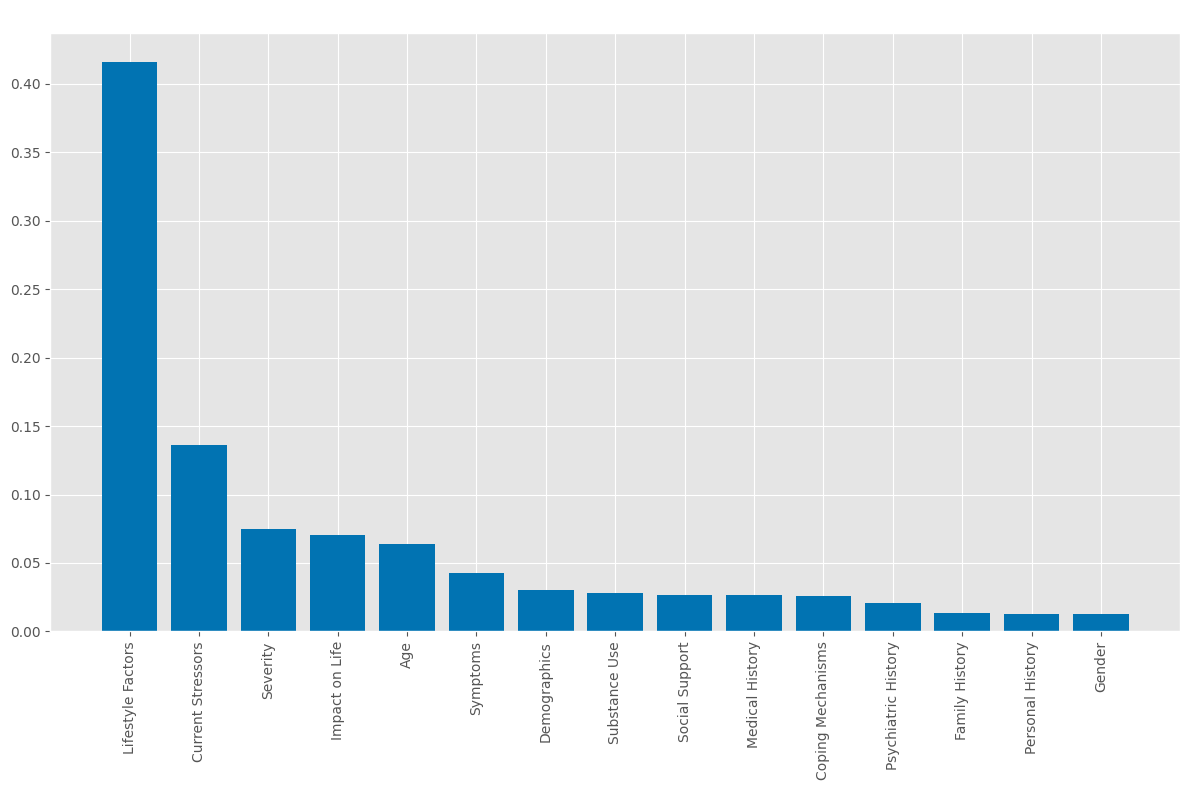


Model successfully saved as 'rf_model.pkl'


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, matthews_corrcoef,classification_report, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
accuracies = dict()
f1_scores = dict()
precision_scores = dict()
recall_scores = dict()
auc_scores = dict()
true_negatives = dict()
false_positives = dict()
false_negatives = dict()
true_positives = dict()
matthews_corrcoefs = dict()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)#train the model


y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)


accuracies['RF'] = accuracy_score(y_test, y_pred)
f1_scores['RF'] = f1_score(y_test, y_pred, zero_division=0)
precision_scores['RF'] = precision_score(y_test, y_pred, zero_division=0)
recall_scores['RF'] = recall_score(y_test, y_pred, zero_division=0)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
true_negatives['RF'] = tn
false_positives['RF'] = fp
false_negatives['RF'] = fn
true_positives['RF'] = tp

matthews_corrcoefs['RF'] = matthews_corrcoef(y_test, y_pred)


print('Model Performance Metrics:')
print('-' * 30)
print(f'Accuracy (RF): {accuracies["RF"]:.4f}')
print(f'Precision (RF): {precision_scores["RF"]:.4f}')
print(f'Recall (RF): {recall_scores["RF"]:.4f}')
print(f'F1 Score (RF): {f1_scores["RF"]:.4f}')
print(f'Matthews Correlation Coefficient (RF): {matthews_corrcoefs["RF"]:.4f}')


print('\nClassification Report:')
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Panic Disorder', 'Panic Disorder'], 
            yticklabels=['No Panic Disorder', 'Panic Disorder'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
features = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("\nModel successfully saved as 'rf_model.pkl'")
